# **결측치의 대체 | ```sklearn.impute```**

* 데이터에 포함되어 있는 결측치들을 시각화하고, 대체해보자.

## 1. 결측치의 시각화

* 라이브러리 설치

In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import sklearn.impute


* 데이터 불러오기

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/MP2023/main/posts/msno.csv")
df

,A,B,C,D,E
0,0.383420,1.385096,NaN,-0.545132,-0.732395
1,1.084175,0.080613,-0.770527,-0.272143,-0.749881
2,1.142778,1.258419,NaN,-0.072007,-0.440757
3,0.307894,0.521400,0.446974,0.329530,-1.457388
4,0.237787,0.132401,-0.516630,0.177995,0.416182
...,...,...,...,...,...
995,0.041092,-1.308165,1.085820,1.136210,NaN
996,-1.286358,1.547987,NaN,-0.174334,-0.579486
997,0.710257,1.764058,NaN,-0.353928,NaN
998,-1.908729,-0.804691,NaN,NaN,-0.066739


**결측치의 수와 분포를 확인해보자**

### A. ```df.info()```

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       668 non-null    float64
 1   B       656 non-null    float64
 2   C       608 non-null    float64
 3   D       668 non-null    float64
 4   E       660 non-null    float64
dtypes: float64(5)
memory usage: 39.2 KB


### B. ```msno.bar()```

<Axes: >

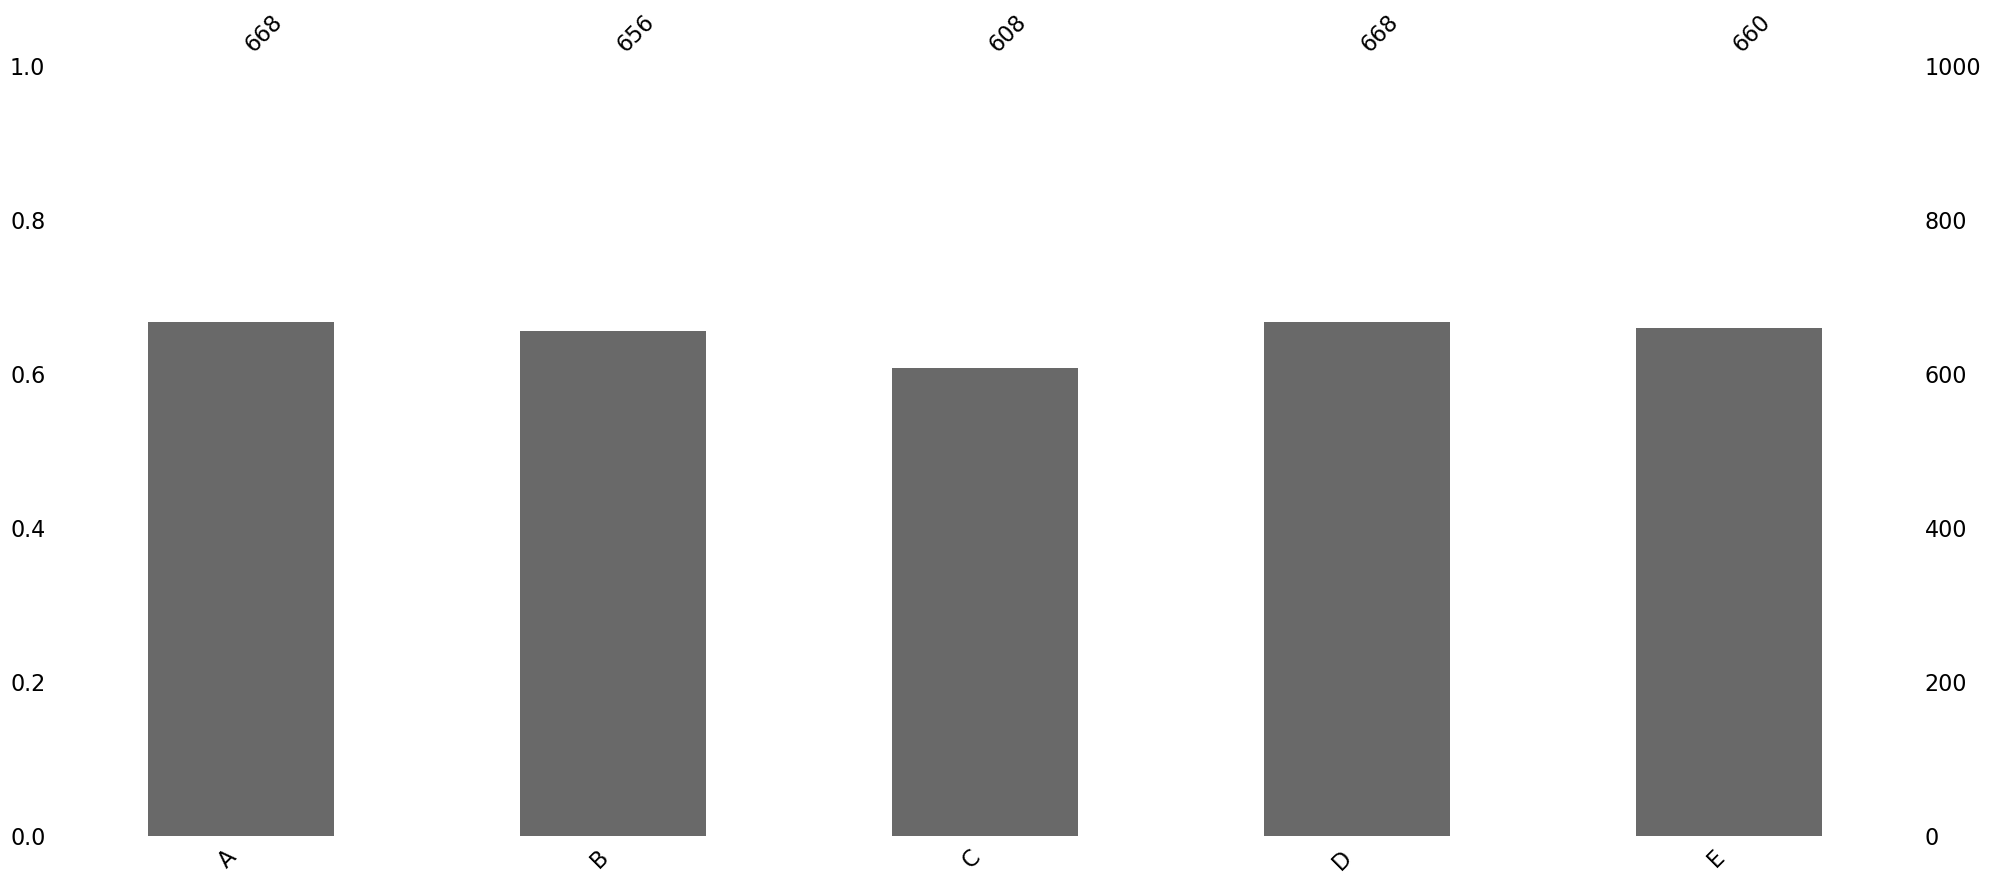

In [4]:
msno.bar(df)

**패턴파악 및 시각화**

### A. ```msno.matrix()```

<AxesSubplot:>

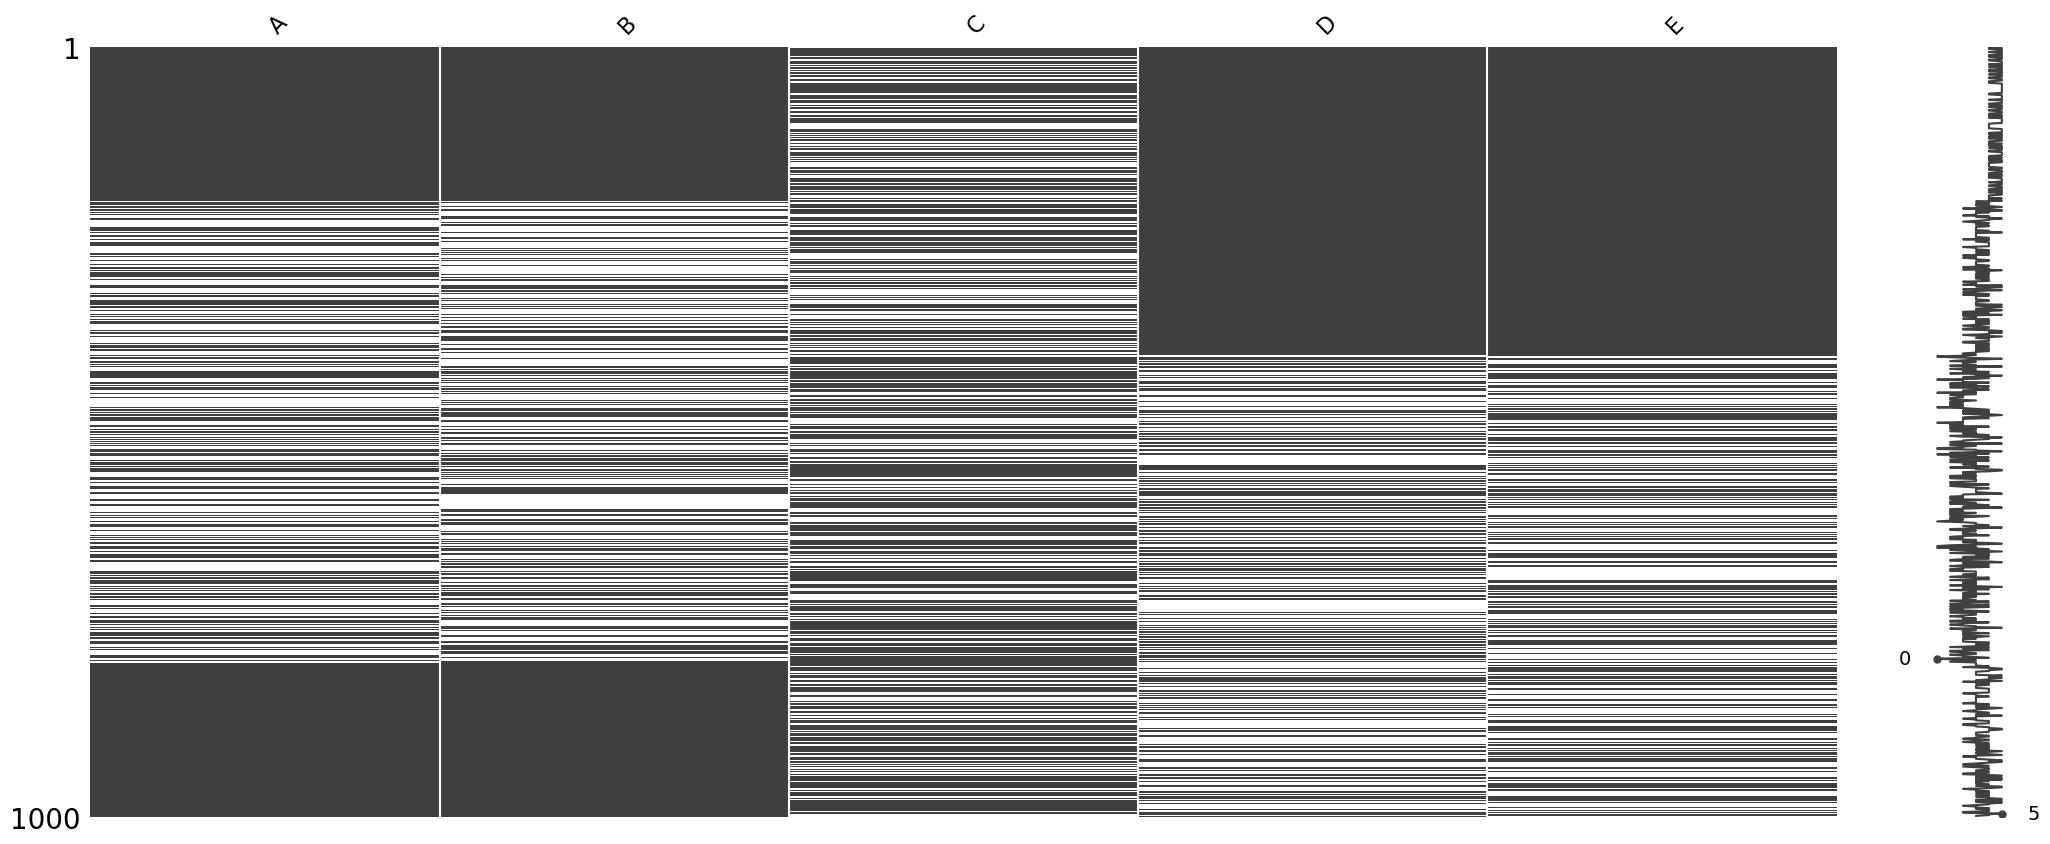

In [3]:
msno.matrix(df)

> 우측 그래프에서 0에 있는 것은 데이터가 하나도 없다는 뜻, 5에 가깝게 있는 것은 데이터가 있다는 뜻. 5개의 데이터셋이니까 그 합이 그래프로 표기된다.

### B. ```msno.heatmap()```

<AxesSubplot:>

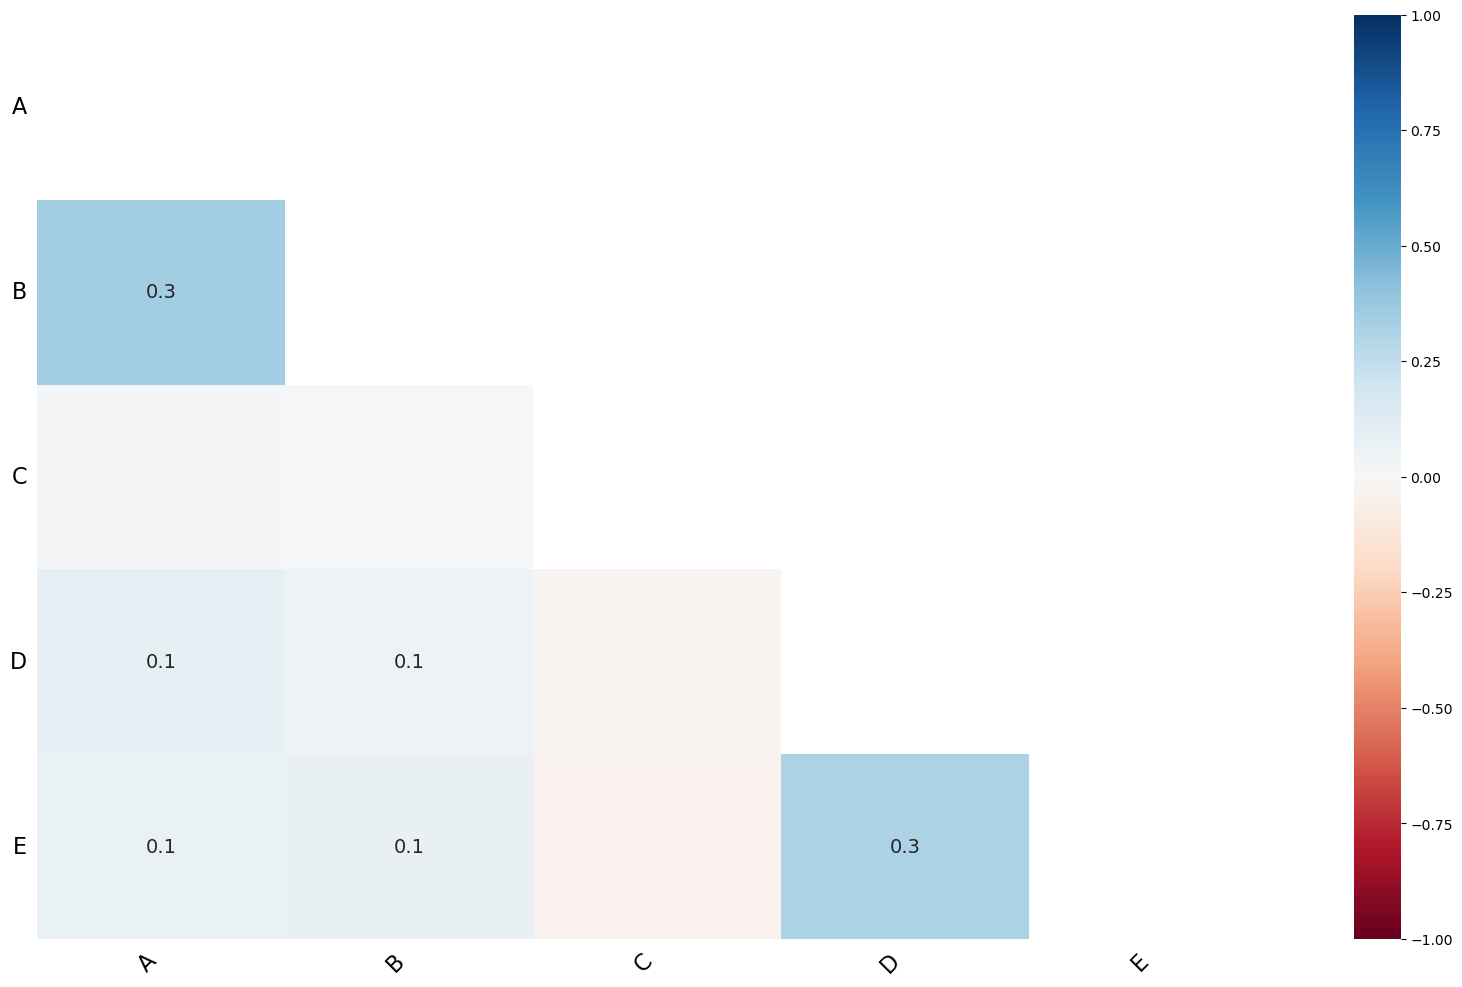

In [5]:
msno.heatmap(df)

> 표기된 숫자가 클수록 결측치의 분포가 비슷함을 의미한다.

> A와 B, D와 E가 유사함을 알 수 있다.

<AxesSubplot:>

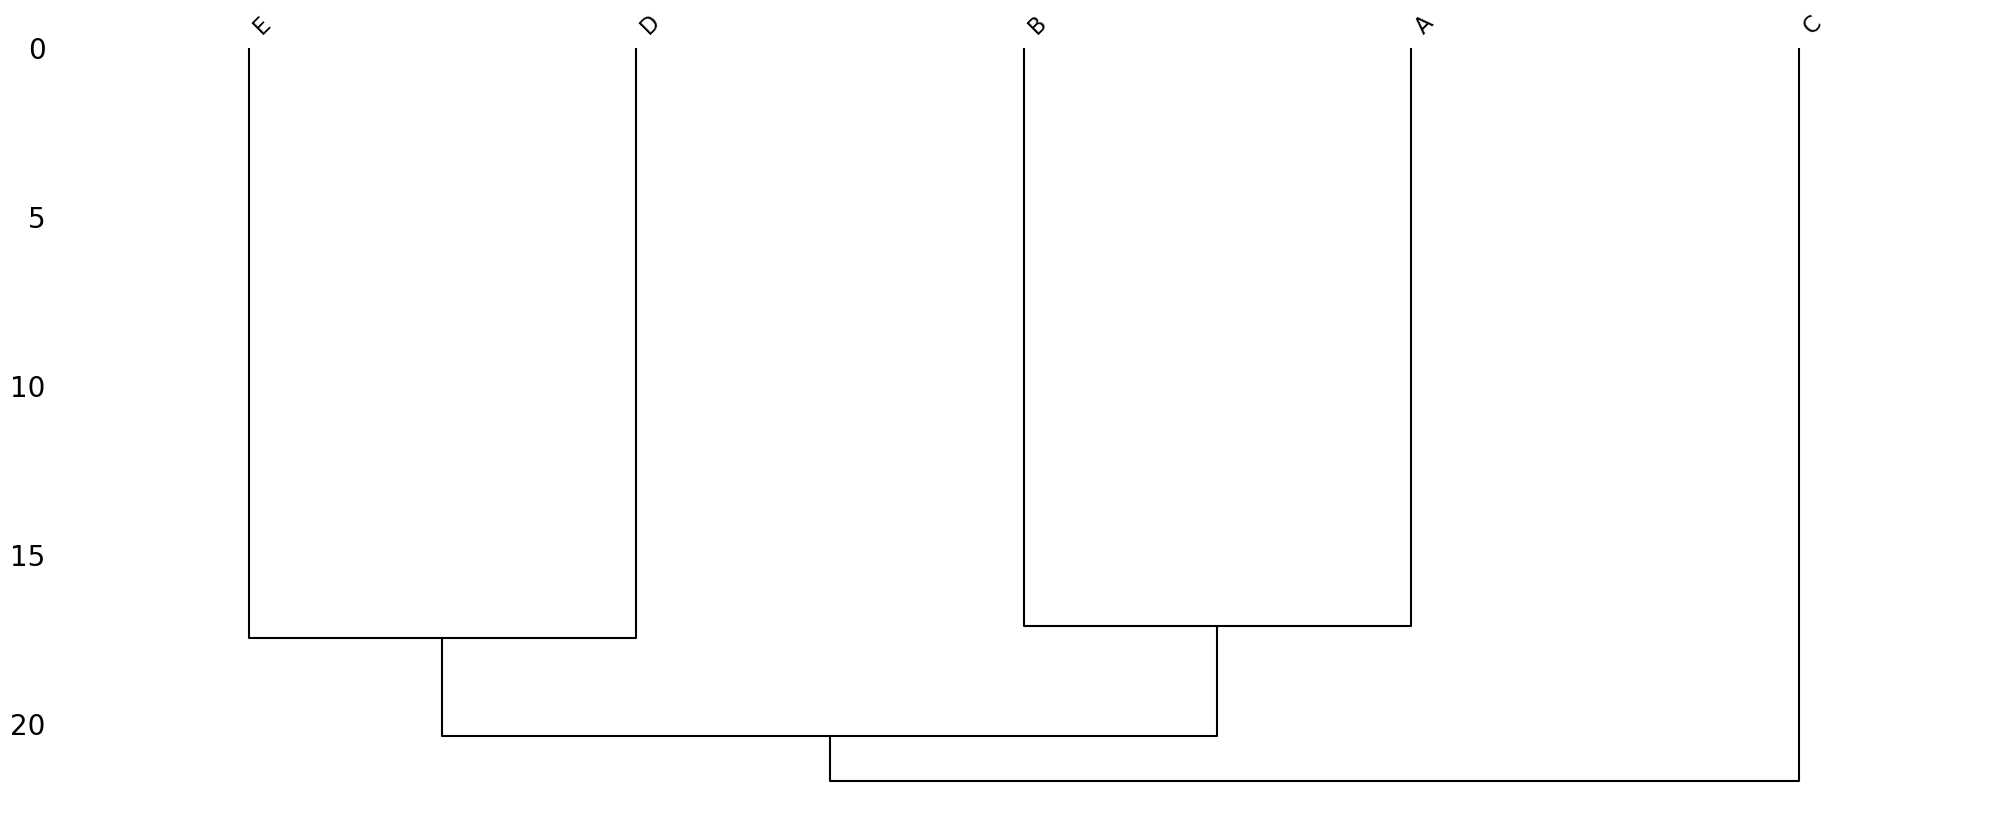

In [6]:
msno.dendrogram(df)

> 구조가 비슷한 자료들을 엮어놓는다.

## 2. 수치형 자료의 결측치 대체
\- 주어진 자료

In [13]:
A = [2.1, 1.9, 2.2, np.nan, 1.9]
B = [0, 0, np.nan, 0, 0]

df = pd.DataFrame({'A' : A, 'B' : B})
df

,A,B
0,2.1,0.0
1,1.9,0.0
2,2.2,NaN
3,NaN,0.0
4,1.9,0.0


* 결측치를 무엇으로 채워주면 좋을까?
> 일단 평균으로 해보면 얼추 맞을 것 같다.

In [8]:
df2 = df
df2.loc[3, "A"] = df2.A.mean()
df2.loc[2, "B"] = df2.B.mean()
df2

,A,B
0,2.100,0.0
1,1.900,0.0
2,2.200,0.0
3,2.025,0.0
4,1.900,0.0


\- 뭔가, 이러한 과정을 자동으로 수행해주는 게 있었으면 좋겠는데?
> ```sklearn.impute``` : 내가 할수 있

**당장 해보자**

(방법 1)

In [14]:
imputr = sklearn.impute.SimpleImputer(strategy = 'mean')
imputr.fit_transform(df)

## imputr.fit(df)
## imputr.transform(df)
## 해당 과정을 축약한 코드이다.

array([[2.1  , 0.   ],
       [1.9  , 0.   ],
       [2.2  , 0.   ],
       [2.025, 0.   ],
       [1.9  , 0.   ]])

\- 뭐, 사실상 predictr를 만들어서 피팅하고 그런 것과 유사하다면 유사하다.

(방법 2) | median 사용

In [16]:
imputr = sklearn.impute.SimpleImputer(strategy = 'median')
imputr.fit_transform(df)

array([[2.1, 0. ],
       [1.9, 0. ],
       [2.2, 0. ],
       [2. , 0. ],
       [1.9, 0. ]])

(방법 3) | most frequent 사용

In [17]:
imputr = sklearn.impute.SimpleImputer(strategy = 'most_frequent')
imputr.fit_transform(df)

array([[2.1, 0. ],
       [1.9, 0. ],
       [2.2, 0. ],
       [1.9, 0. ],
       [1.9, 0. ]])

(방법 4) | 임의로 상수를 지정

In [18]:
imputr = sklearn.impute.SimpleImputer(strategy = 'constant', fill_value = 999)
imputr.fit_transform(df)

array([[  2.1,   0. ],
       [  1.9,   0. ],
       [  2.2, 999. ],
       [999. ,   0. ],
       [  1.9,   0. ]])

## 3. 범주형 자료의 결측치 대체

In [19]:
df = pd.DataFrame({'A':['Y','N','Y','Y',np.nan], 'B':['stat','math',np.nan,'stat','bio']})
df

,A,B
0,Y,stat
1,N,math
2,Y,NaN
3,Y,stat
4,NaN,bio


\- 범주형 자료의 경우에도 비슷하게 하면 된다.

(방법 1) | 최빈값으로 대체

In [20]:
imputr = sklearn.impute.SimpleImputer(strategy = 'most_frequent')
imputr.fit_transform(df)

array([['Y', 'stat'],
       ['N', 'math'],
       ['Y', 'stat'],
       ['Y', 'stat'],
       ['Y', 'bio']], dtype=object)

(방법 2) | 상수(특정한 데이터)로 대체

In [23]:
imputr1 = sklearn.impute.SimpleImputer(strategy = 'constant', fill_value = 'Y')
imputr2 = sklearn.impute.SimpleImputer(strategy = 'constant', fill_value = 'stat')

A_ = imputr1.fit_transform(df[['A']])
B_ = imputr2.fit_transform(df[['B']])

np.concatenate([A_, B_], axis = 1)   ## axis = 1을 하지 않으면 행으로 결합해버림.

array([['Y'],
       ['N'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['stat'],
       ['math'],
       ['stat'],
       ['stat'],
       ['bio']], dtype=object)

> 일반적으로 연속형ㆍ숫자형 자료에는 평균, 범주형 자료에는 최빈값으로 대체한다.

## 4. 혼합형 자료의 impute

### **A. 모두 최빈값으로 impute**

```# 예제``` : 아래의 ```df```에서 결측치를 모두 최빈값으로 impute하라.

In [24]:
df = pd.DataFrame(
    {'A':[2.1,1.9,2.2,np.nan,1.9],
     'B':[0,0,np.nan,0,0],
     'C':['Y','N','Y','Y',np.nan], 
     'D':['stat','math',np.nan,'stat','bio']}
)
df

,A,B,C,D
0,2.1,0.0,Y,stat
1,1.9,0.0,N,math
2,2.2,NaN,Y,NaN
3,NaN,0.0,Y,stat
4,1.9,0.0,NaN,bio


(풀이)

In [27]:
imputr = sklearn.impute.SimpleImputer(strategy = 'most_frequent')
imputr.fit_transform(df)

array([[2.1, 0.0, 'Y', 'stat'],
       [1.9, 0.0, 'N', 'math'],
       [2.2, 0.0, 'Y', 'stat'],
       [1.9, 0.0, 'Y', 'stat'],
       [1.9, 0.0, 'Y', 'bio']], dtype=object)

### **B. 숫자형은 평균값으로, 범주형은 최빈값으로 impute**

```# 예제``` : 아래의 ```df```를 숫자형일 경우 평균, 문자형일 경우는 최빈값으로 대치하라.

> ```select_dtypes()```

In [28]:
df = pd.DataFrame(
    {'A':[2.1,1.9,2.2,np.nan,1.9],
     'B':[0,0,np.nan,0,0],
     'C':['Y','N','Y','Y',np.nan], 
     'D':['stat','math',np.nan,'stat','bio']}
)
df

,A,B,C,D
0,2.1,0.0,Y,stat
1,1.9,0.0,N,math
2,2.2,NaN,Y,NaN
3,NaN,0.0,Y,stat
4,1.9,0.0,NaN,bio


(풀이 1)

\- 1. 복사본 생성

In [30]:
df_ = df.copy()
df_

,A,B,C,D
0,2.1,0.0,Y,stat
1,1.9,0.0,N,math
2,2.2,NaN,Y,NaN
3,NaN,0.0,Y,stat
4,1.9,0.0,NaN,bio


\- 2. 데이터프레임 분리

In [31]:
df_num = df.select_dtypes(include = 'number')
df_num

,A,B
0,2.1,0.0
1,1.9,0.0
2,2.2,NaN
3,NaN,0.0
4,1.9,0.0


In [32]:
df_cat = df.select_dtypes(exclude = 'number')  ## 숫자형은 제외
df_cat

,C,D
0,Y,stat
1,N,math
2,Y,NaN
3,Y,stat
4,NaN,bio


\- 3. impute

In [34]:
df_[df_num.columns] = sklearn.impute.SimpleImputer(strategy = 'mean').fit_transform(df_num)
df_[df_cat.columns] = sklearn.impute.SimpleImputer(strategy = 'most_frequent').fit_transform(df_cat)
df_

,A,B,C,D
0,2.100,0.0,Y,stat
1,1.900,0.0,N,math
2,2.200,0.0,Y,stat
3,2.025,0.0,Y,stat
4,1.900,0.0,Y,bio


> 위와 같이 열과 행 따로 결측치를 대체하였다.